# **Import Libraries**

In [ ]:
# Importing all the libraries to be used

import nltk
import re
from nltk.corpus import stopwords
import string
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix



# **Loading Data**

In [ ]:
df = pd.read_csv('/content/Bitext_Sample_Customer_Support_Training_Dataset_27K_responses-v11 (1).csv')
df.head()

,flags,instruction,category,intent,response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...


Each **entry** in the dataset contains the following fields:

**flags**: tags (explained below in the Language Generation Tags section)


**instruction**: a **user request** from the Customer Service domain

**category**: the high-level semantic category for the intent

**intent**: the intent corresponding to the user instruction


**response**: an example expected response from the virtual assistant

**Categories and Intents**

The categories and intents covered by the dataset are:

**ACCOUNT**: create_account, delete_account, edit_account, switch_account

**CANCELLATION_FEE**: check_cancellation_fee

**DELIVERY**: delivery_options

**FEEDBACK**: complaint, review

**INVOICE**: check_invoice, get_invoice

**NEWSLETTER**: newsletter_subscription

**ORDER**: cancel_order, change_order, place_order

**PAYMENT**: check_payment_methods, payment_issue

**REFUND**: check_refund_policy, track_refund

**SHIPPING_ADDRESS**: change_shipping_address, set_up_shipping_address



---



The **entities** covered by the dataset are:

{{**Order Number**}},
typically present in:
*Intents*:

cancel_order, change_order, change_shipping_address, check_invoice, check_refund_policy, complaint, delivery_options, delivery_period, get_invoice, get_refund, place_order, track_order, track_refund


{{**Invoice Number**}}, typically present in:
*Intents*:
 check_invoice, get_invoice


{{**Online Order Interaction**}}, typically present in:
*Intents:* cancel_order, change_order, check_refund_policy, delivery_period, get_refund, review, track_order, track_refund


{{Online Payment Interaction}}, typically present in:
Intents: cancel_order, check_payment_methods


{{Online Navigation Step}}, typically present in:
Intents: complaint, delivery_options


{{Online Customer Support Channel}}, typically present in:

Intents: check_refund_policy, complaint, contact_human_agent, delete_account, delivery_options, edit_account, get_refund, payment_issue, registration_problems, switch_account


{{Profile}}, typically present in:

Intent: switch_account


{{Profile Type}}, typically present in:

Intent: switch_account


{{Settings}}, typically present in:

Intents: cancel_order, change_order, change_shipping_address, check_cancellation_fee, check_invoice, check_payment_methods, contact_human_agent, delete_account, delivery_options, edit_account, get_invoice, newsletter_subscription, payment_issue, place_order, recover_password, registration_problems, set_up_shipping_address, switch_account, track_order, track_refund


{{Online Company Portal Info}}, typically present in:
Intents: cancel_order, edit_account

{{Date}}, typically present in:
Intents: check_invoice, check_refund_policy, get_refund, track_order, track_refund


{{Date Range}}, typically present in:
Intents: check_cancellation_fee, check_invoice, get_invoice


{{Shipping Cut-off Time}}, typically present in:
Intent: delivery_options


{{Delivery City}}, typically present in:
Intent: delivery_options


{{Delivery Country}}, typically present in:
Intents: check_payment_methods, check_refund_policy, delivery_options, review, switch_account


{{Salutation}}, typically present in:
Intents: cancel_order, check_payment_methods, check_refund_policy, create_account, delete_account, delivery_options, get_refund, recover_password, review, set_up_shipping_address, switch_account, track_refund


{{Client First Name}}, typically present in:
Intents: check_invoice, get_invoice


{{Client Last Name}}, typically present in:
Intents: check_invoice, create_account, get_invoice


{{Customer Support Phone Number}}, typically present in:
Intents: change_shipping_address, contact_customer_service, contact_human_agent, payment_issue


{{Customer Support Email}}, typically present in:
Intents: cancel_order, change_shipping_address, check_invoice, check_refund_policy, complaint, contact_customer_service, contact_human_agent, get_invoice, get_refund, newsletter_subscription, payment_issue, recover_password, registration_problems, review, set_up_shipping_address, switch_account


{{Live Chat Support}}, typically present in:
Intents: check_refund_policy, complaint, contact_human_agent, delete_account, delivery_options, edit_account, get_refund, payment_issue, recover_password, registration_problems, review, set_up_shipping_address, switch_account, track_order


{{Website URL}}, typically present in:
Intents: check_payment_methods, check_refund_policy, complaint, contact_customer_service, contact_human_agent, create_account, delete_account, delivery_options, get_refund, newsletter_subscription, payment_issue, place_order, recover_password, registration_problems, review, switch_account


{{Upgrade Account}}, typically present in:
Intents: create_account, edit_account, switch_account


{{Account Type}}, typically present in:
Intents: cancel_order, change_order, change_shipping_address, check_cancellation_fee, check_invoice, check_payment_methods, check_refund_policy, complaint, contact_customer_service, contact_human_agent, create_account, delete_account, delivery_options, delivery_period, edit_account, get_invoice, get_refund, newsletter_subscription, payment_issue, place_order, recover_password, registration_problems, review, set_up_shipping_address, switch_account, track_order, track_refund


{{Account Category}}, typically present in:
Intents: cancel_order, change_order, change_shipping_address, check_cancellation_fee, check_invoice, check_payment_methods, check_refund_policy, complaint, contact_customer_service, contact_human_agent, create_account, delete_account, delivery_options, delivery_period, edit_account, get_invoice, get_refund, newsletter_subscription, payment_issue, place_order, recover_password, registration_problems, review, set_up_shipping_address, switch_account, track_order, track_refund


{{Account Change}}, typically present in:
Intent: switch_account


{{Program}}, typically present in:
Intent: place_order


{{Refund Amount}}, typically present in:
Intent: track_refund


{{Money Amount}}, typically present in:
Intents: check_refund_policy, complaint, get_refund, track_refund


{{Store Location}}, typically present in:
Intents: complaint, delivery_options, place_order



---



**Tags** for Lexical variation

M - Morphological variation: inflectional and derivational “is my SIM card active”, “is my SIM card activated”

L - Semantic variations: synonyms, use of hyphens, compounding… “what’s my billing date", “what’s my anniversary date”

Tags for Syntactic structure variation
B - Basic syntactic structure: “activate my SIM card”, “I need to activate my SIM card”

I - Interrogative structure “can you activate my SIM card?”, “how do I activate my SIM card?”

C - Coordinated syntactic structure “I have a new SIM card, what do I need to do to activate it?”

N - Negation “I do not want this item, where to cancel my order?”

Tags for language register variations
P - Politeness variation “could you help me activate my SIM card, please?”

Q - Colloquial variation “can u activ8 my SIM?”

W - Offensive language “I want to talk to a f&%g agent”

Tags for stylistic variations
K - Keyword mode "activate SIM", "new SIM"

E - Use of abbreviations: “I'm / I am interested in getting a new SIM”

Z - Errors and Typos: spelling issues, wrong punctuation… “how can i activaet my card”

Other tags not in use in this Dataset
D - Indirect speech “ask my agent to activate my SIM card”

G - Regional variations US English vs UK English: "truck" vs "lorry" France French vs Canadian French: "tchatter" vs "clavarder"

R - Respect structures - Language-dependent variations English: "may" vs "can…" French: "tu" vs "vous…" Spanish: "tú" vs "usted…"

Y - Code switching “activer ma SIM card”

In [ ]:
df.columns

Index(['flags', 'instruction', 'category', 'intent', 'response'], dtype='object')

In [ ]:
df.shape

(26872, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26872 entries, 0 to 26871
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   flags        26872 non-null  object
 1   instruction  26872 non-null  object
 2   category     26872 non-null  object
 3   intent       26872 non-null  object
 4   response     26872 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB


In [ ]:
df.head()

,flags,instruction,category,intent,response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...


In [ ]:
df.isnull().sum()

,0
flags,0
instruction,0
category,0
intent,0
response,0


In [ ]:
df['category'].unique()

array(['ORDER', 'SHIPPING', 'CANCEL', 'INVOICE', 'PAYMENT', 'REFUND',
       'FEEDBACK', 'CONTACT', 'ACCOUNT', 'DELIVERY', 'SUBSCRIPTION'],
      dtype=object)

In [ ]:
df['category'].value_counts()

,count
category,
ACCOUNT,5986
ORDER,3988
REFUND,2992
CONTACT,1999
INVOICE,1999
PAYMENT,1998
FEEDBACK,1997
DELIVERY,1994
SHIPPING,1970


Unbalanced Class

In [ ]:
df['intent'].unique()

array(['cancel_order', 'change_order', 'change_shipping_address',
       'check_cancellation_fee', 'check_invoice', 'check_payment_methods',
       'check_refund_policy', 'complaint', 'contact_customer_service',
       'contact_human_agent', 'create_account', 'delete_account',
       'delivery_options', 'delivery_period', 'edit_account',
       'get_invoice', 'get_refund', 'newsletter_subscription',
       'payment_issue', 'place_order', 'recover_password',
       'registration_problems', 'review', 'set_up_shipping_address',
       'switch_account', 'track_order', 'track_refund'], dtype=object)

In [ ]:
df['intent'].value_counts()

,count
intent,
contact_customer_service,1000
complaint,1000
check_invoice,1000
switch_account,1000
edit_account,1000
contact_human_agent,999
check_payment_methods,999
delivery_period,999
newsletter_subscription,999


this class shows more balance

In [ ]:
df['instruction'].unique()

array(['question about cancelling order {{Order Number}}',
       'i have a question about cancelling oorder {{Order Number}}',
       'i need help cancelling puchase {{Order Number}}', ...,
       'how to see if there is anything wrong with my restitution?',
       "I don't know what to do to see my reimbursement status",
       'I need to know if there is anything new on the restitution'],
      dtype=object)

In [ ]:
len(df['instruction'].unique())

24635

In [ ]:
df['instruction'].value_counts()

,count
instruction,
shiping to {{Delivery City}},8
do you ship to {{Delivery City}}?,8
shipments to {{Delivery City}},8
deliveries to {{Delivery City}},8
is it possible to order from {{Delivery City}}?,8
...,...
help to speak with aj assistant,1
I want to contact a human agent,1
i do not understand ya is it possible to speak to osmebody,1


In [ ]:
df['flags'].unique()

array(['B', 'BQZ', 'BLQZ', 'BL', 'BCELN', 'BI', 'BCLN', 'BLQ', 'BQ',
       'BLZ', 'BIL', 'BCL', 'BMQ', 'BZ', 'BELQ', 'BLN', 'BLP', 'BCELNQZ',
       'BM', 'BIPQ', 'BIPZ', 'BK', 'BIQ', 'BEL', 'BCELNV', 'BILP', 'BLWZ',
       'BIQZ', 'BLM', 'BCILN', 'BCLQWZ', 'BCLM', 'BILQ', 'BCLP', 'BEQ',
       'BILPQ', 'BILPQZ', 'BEQZ', 'BCELV', 'BLMQ', 'BLNQZ', 'BILZ',
       'BMQZ', 'BCIL', 'BKL', 'BIMP', 'BELN', 'BCILNP', 'BIZ', 'BCELMVZ',
       'BKZ', 'BLNQ', 'BCLQW', 'BNQ', 'BKLZ', 'BEZ', 'BPZ', 'BCEILN',
       'BCELNW', 'BCLNQZ', 'BLW', 'BELQZ', 'BCILNPQ', 'BCLQZ', 'BLNZ',
       'BCINPQZ', 'BELP', 'BEPQZ', 'BCINPQ', 'BCINZ', 'BCQ', 'BCILQWZ',
       'BC', 'BCEILNPQZ', 'BLMZ', 'BE', 'BCILQ', 'BCILM', 'BCELNQ',
       'BIPQZ', 'BELNQ', 'BNZ', 'BN', 'BCZ', 'BCELMV', 'BCNPQZ', 'BILQZ',
       'BCLMW', 'BLMQZ', 'BCLNP', 'BCEILNQZ', 'BCLW', 'BCNQZ', 'BNQZ',
       'BELNQZ', 'BILW', 'BCEQVWZ', 'BCNQ', 'BCLMQ', 'BMZ', 'BMW', 'BCIQ',
       'BEMNQW', 'BLMQW', 'BILMZ', 'BILM', 'BILMQ', 'BLMNQZ', 'BCIL

In [ ]:
df['flags'].value_counts()

,count
flags,
BL,5212
BLQ,2467
BIL,2138
BLM,1297
BILQ,1057
...,...
BIPQWZ,1
BENQWZ,1
BPQWZ,1


In [ ]:
df['response'].unique()

array(["I've understood you have a question regarding canceling order {{Order Number}}, and I'm here to provide you with the information you need. Please go ahead and ask your question, and I'll do my best to assist you.",
       "I've been informed that you have a question about canceling order {{Order Number}}. I'm here to assist you! Please go ahead and let me know what specific question you have, and I'll provide you with all the information and guidance you need. Your satisfaction is my top priority.",
       "I can sense that you're seeking assistance with canceling your purchase with the purchase number {{Order Number}}. I apologize for any inconvenience caused, and I'm here to guide you through the process.\n\nTo cancel your purchase, please follow these steps:\n\n1. Log into your account: Visit our {{Online Company Portal Info}} and sign in using your credentials.\n2. Locate your order: Once logged in, navigate to the '{{Online Order Interaction}}' or '{{Online Order Interacti

In [ ]:
len(df['response'].unique())

26870

In [ ]:
df['response'].value_counts()

,count
response,
"Firstly, I truly understand how pivotal the {{Currency Symbol}}{{Refund Amount}} refund is for you. Every dollar counts, and we’re in this together. We acknowledge the importance of swift resolutions to your queries. Let me swiftly dive into the current status of your refund. As you patiently await, might I ask if you’ve ever had to follow up on a refund before? We value your insights and your patience alike. Rest assured, we're doing everything we can to ensure your satisfaction and trust.",2
"Firstly, I truly understand how pivotal the {{Currency Symbol}}{{Refund Amount}} rebate is for you. Every dollar counts, and we’re in this together. We acknowledge the importance of swift resolutions to your queries. Let me swiftly dive into the current status of your rebate. As you patiently await, might I ask if you’ve ever had to follow up on a rebate before? We value your insights and your patience alike. Rest assured, we're doing everything we can to ensure your satisfaction and trust.",2
"I'm sorry to hear that you're facing difficulties with online payments. I'm here to assist you in reporting this issue and finding a solution. To begin the process, please provide me with some more details about the problem you encountered during the payment. Did you receive any error messages or codes? Knowing these specifics will help us investigate and resolve the issue more efficiently. Thank you for bringing this to our attention, and rest assured that we are committed to resolving the problem and providing you with a seamless payment experience.",1
"I apologize for the frustration you're facing with this payment issue. Rest assured, I'm here to provide you with the necessary assistance to resolve it. Please share the specific details of the payment issue you're encountering so that we can take appropriate actions to rectify it. Your feedback is valuable in helping us improve our payment system and ensure a smoother experience for all our customers. Thank you for reaching out, and together, we'll work towards a solution.",1
"I'm sorry to hear that you're experiencing problems with online payments. I'm here to provide you with the necessary assistance to inform us about these issues. Please provide me with more details about the specific problems you're encountering. This will help us gain a better understanding of the situation and find the most appropriate solution. Thank you for reaching out to us, and rest assured, we're committed to resolving this matter for you.",1
...,...
"Always good to connect! I'm attuned to the fact that you need assistance to talk to someone. Rest assured, I'm here to help you with that. I will promptly connect you with one of our dedicated human representatives who will provide you with the support you need. Just give me a moment to make the arrangements. Stay with me, and we'll get you the assistance you're looking for.",1
"We value your outreach! I'm in tune with the fact that you are unsure of the steps to take in order to talk to a live agent. Allow me to guide you through the process and make it easier for you. To talk to a live agent, you can simply click on the ""Chat"" button on our website or app, or you can call our customer support hotline. Our agents are available to assist you and provide the help you need. If you need any further assistance or have any other questions, please feel free to let me know.",1
"Your reach-out is appreciated! I'm sensing that you would like to speak with a human operator and I'm here to assist you. I apologize if you experienced any frustration, and I'll do my best to connect you with a live operator as quickly as possible. Your satisfaction is our priority, and we appreciate your patience. While I transfer your call, is there anything specific you would like to discuss or any particular issue you need assistance with? Your insights will help us provide you with the most suitable support. You're in good hands, and we'll work together to ensure your needs 

## Initial Exploring (the purpose is to select our target)

### intent or catgory

#### intent

In [ ]:
df['intent'].unique()

array(['cancel_order', 'change_order', 'change_shipping_address',
       'check_cancellation_fee', 'check_invoice', 'check_payment_methods',
       'check_refund_policy', 'complaint', 'contact_customer_service',
       'contact_human_agent', 'create_account', 'delete_account',
       'delivery_options', 'delivery_period', 'edit_account',
       'get_invoice', 'get_refund', 'newsletter_subscription',
       'payment_issue', 'place_order', 'recover_password',
       'registration_problems', 'review', 'set_up_shipping_address',
       'switch_account', 'track_order', 'track_refund'], dtype=object)

In [ ]:
df['intent'].value_counts()

,count
intent,
contact_customer_service,1000
complaint,1000
check_invoice,1000
switch_account,1000
edit_account,1000
contact_human_agent,999
check_payment_methods,999
delivery_period,999
newsletter_subscription,999


For each row, there is a corresponding **category** and **intent**.  

The **category** serves as the primary classification, while the **intent** acts as the sub-category, providing more specific details.

#### Category

In [ ]:
df.groupby('category')['intent'].value_counts()

category      intent                  
ACCOUNT       edit_account                1000
              switch_account              1000
              registration_problems        999
              create_account               997
              delete_account               995
              recover_password             995
CANCEL        check_cancellation_fee       950
CONTACT       contact_customer_service    1000
              contact_human_agent          999
DELIVERY      delivery_period              999
              delivery_options             995
FEEDBACK      complaint                   1000
              review                       997
INVOICE       check_invoice               1000
              get_invoice                  999
ORDER         cancel_order                 998
              place_order                  998
              change_order                 997
              track_order                  995
PAYMENT       check_payment_methods        999
              payment_issue                999
REFUND        track_refund                 998
              check_refund_policy          997
              get_refund                   997
SHIPPING      set_up_shipping_address      997
              change_shipping_address      973
SUBSCRIPTION  newsletter_subscription      999
Name: count, dtype: int64

So, we decided to use **category** as our target column and treat the **instruction** as customer complaints that need to be classified.

# **Selcet_Important_Columns** (Feature Selection)

In [ ]:
important_column = ['instruction','category']
df = df[important_column]
df.head()

,instruction,category
0,question about cancelling order {{Order Number}},ORDER
1,i have a question about cancelling oorder {{Or...,ORDER
2,i need help cancelling puchase {{Order Number}},ORDER
3,I need to cancel purchase {{Order Number}},ORDER
4,"I cannot afford this order, cancel purchase {{...",ORDER


# Exploring New Data

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26872 entries, 0 to 26871
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instruction  26872 non-null  object
 1   category     26872 non-null  object
dtypes: object(2)
memory usage: 420.0+ KB


In [ ]:
df.shape

(26872, 2)

In [ ]:
df.columns

Index(['instruction', 'category'], dtype='object')

In [ ]:
df.describe(include=['O'])

,instruction,category
count,26872,26872
unique,24635,11
top,shiping to {{Delivery City}},ACCOUNT
freq,8,5986


In [ ]:
df.isnull().mean()*100

,0
instruction,0.0
category,0.0


## 1.  Category column 📊




In [ ]:
df['category'].unique()

array(['ORDER', 'SHIPPING', 'CANCEL', 'INVOICE', 'PAYMENT', 'REFUND',
       'FEEDBACK', 'CONTACT', 'ACCOUNT', 'DELIVERY', 'SUBSCRIPTION'],
      dtype=object)

In [ ]:
df['category'].value_counts()

,count
category,
ACCOUNT,5986
ORDER,3988
REFUND,2992
CONTACT,1999
INVOICE,1999
PAYMENT,1998
FEEDBACK,1997
DELIVERY,1994
SHIPPING,1970


<Axes: xlabel='count', ylabel='category'>

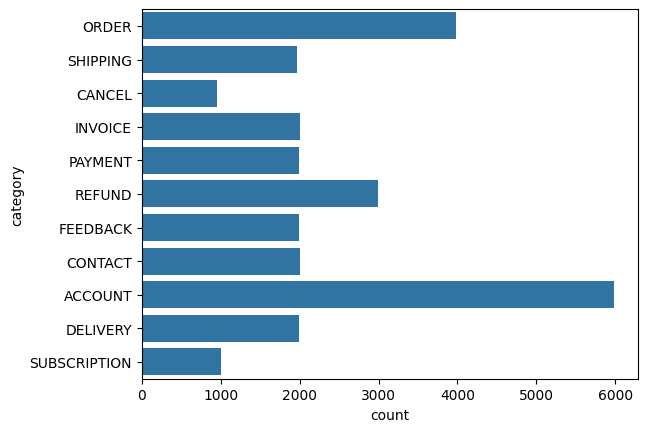

In [ ]:
sns.countplot(df['category'])

The dataset exhibits imbalanced class labels.

In [ ]:
df['category'].value_counts()

,count
category,
ACCOUNT,5986
ORDER,3988
REFUND,2992
CONTACT,1999
INVOICE,1999
PAYMENT,1998
FEEDBACK,1997
DELIVERY,1994
SHIPPING,1970


In [ ]:
df.isnull().mean()*100

,0
instruction,0.0
category,0.0


## Check duplicates

In [ ]:
df[df.duplicated()]['category'].unique()

array(['ORDER', 'INVOICE', 'ACCOUNT', 'DELIVERY', 'REFUND'], dtype=object)

In [ ]:
df.duplicated().sum()

np.int64(2237)

## Cleaning Data

In [ ]:
df.shape

(26872, 2)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(24635, 2)

# Text Preprocessing

## Show Samples from Data

In [ ]:
for i in df['category'].unique():
  print(i + ': ' + str(df[df['category'] == i].shape[0]))
  print(df[df['category'] == i]['instruction'].iloc[100])
  print()

ORDER: 3168
would it be possible to cancel purchase {{Order Number}}

SHIPPING: 1970
I entered a wrong address, will you help me update it?

CANCEL: 950
I need help checking the early exit charge

INVOICE: 1830
is it possible to look for my bill #85632

PAYMENT: 1998
want assistance listing your available payment options

REFUND: 2622
could I see in what situations can I request my money back?

FEEDBACK: 1997
how to make a complaint against your organization?

CONTACT: 1999
I want to speak with customer assistance

ACCOUNT: 5443
can I open a freemium account?

DELIVERY: 1659
is it possible toorder from {{Delivery City}}

SUBSCRIPTION: 999
how to unsubscribe from ur corporate newsletter



## Delete All text between {}

In [ ]:
def remove_curly_braces(text):
  """Removes curly braces and their content from a string.

  Args:
    text: The input string.

  Returns:
    The string with curly braces and their content removed.
  """
  text = re.sub(r'\{\{.*?\}\}', '', text)
  return text

# Apply the function to the 'instruction' column
df['instruction'] = df['instruction'].apply(remove_curly_braces)

In [ ]:
df.head()

,instruction,category
0,question about cancelling order,ORDER
1,i have a question about cancelling oorder,ORDER
2,i need help cancelling puchase,ORDER
3,I need to cancel purchase,ORDER
4,"I cannot afford this order, cancel purchase",ORDER


Remove parts of the text that are not unique or informative, as they do not add value.

## Recheck text between {}

In [ ]:
import re

# Assuming features is a pandas Series or DataFrame column
def extract_curly_brace_content(text):
    pattern = r'\{(.*?)\}'
    matches = re.findall(pattern, str(text))  # Convert to string for safety
    return str(matches)

# Apply the function to the 'instruction' column
df['extracted_content'] = df['instruction'].apply(extract_curly_brace_content)

In [ ]:
df.head()

,instruction,category,extracted_content
0,question about cancelling order,ORDER,[]
1,i have a question about cancelling oorder,ORDER,[]
2,i need help cancelling puchase,ORDER,[]
3,I need to cancel purchase,ORDER,[]
4,"I cannot afford this order, cancel purchase",ORDER,[]


In [ ]:
df['extracted_content'].unique()

array(['[]'], dtype=object)

## making sure using return Function

In [ ]:
df['extracted_content'] = df['instruction'].apply(extract_curly_brace_content)
df["extracted_content"].unique()

array(['[]'], dtype=object)

In [ ]:
df.drop(columns=['extracted_content'],inplace=True)

In [ ]:
df.columns

Index(['instruction', 'category'], dtype='object')

In [ ]:
df.head()

,instruction,category
0,question about cancelling order,ORDER
1,i have a question about cancelling oorder,ORDER
2,i need help cancelling puchase,ORDER
3,I need to cancel purchase,ORDER
4,"I cannot afford this order, cancel purchase",ORDER


## Adding a column of numbers of charachters,words and sentences in each msg


In [ ]:
df.columns

Index(['instruction', 'category'], dtype='object')

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Download the 'punkt' tokenizer
nltk.download('punkt')
#Adding a column of numbers of charachters,words and sentences in each msg
df["No_of_Characters"] = df["instruction"].apply(len)
df["No_of_Words"]=df.apply(lambda row: nltk.word_tokenize(row["instruction"]), axis=1).apply(len)
df["No_of_sentence"]=df.apply(lambda row: nltk.sent_tokenize(row["instruction"]), axis=1).apply(len)

df.describe().T

#PS. At this step, I tokenised the words and sentences and used the length of the same.
#More on Tokenizing later in the notebook.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,count,mean,std,min,25%,50%,75%,max
No_of_Characters,24635.0,43.961437,10.758208,6.0,37.0,45.0,53.0,60.0
No_of_Words,24635.0,8.888898,2.866894,1.0,7.0,9.0,11.0,17.0
No_of_sentence,24635.0,1.000203,0.014245,1.0,1.0,1.0,1.0,2.0


## Expanding Contraction
{i'd like -> i would like }

In [ ]:
df.columns

Index(['instruction', 'category', 'No_of_Characters', 'No_of_Words',
       'No_of_sentence'],
      dtype='object')

In [ ]:
!pip install contractions==0.1.73
import contractions

def expand_contractions(text):
  """Expands contractions in a string.

  Args:
    text: The input string.

  Returns:
    The string with contractions expanded.
  """
  expanded_text = contractions.fix(text)
  return expanded_text

df['instruction'] = df['instruction'].apply(expand_contractions)




In [ ]:
df.head()

,instruction,category,No_of_Characters,No_of_Words,No_of_sentence
0,question about cancelling order,ORDER,32,4,1
1,i have a question about cancelling oorder,ORDER,42,7,1
2,i need help cancelling puchase,ORDER,31,5,1
3,I need to cancel purchase,ORDER,26,5,1
4,"I cannot afford this order, cancel purchase",ORDER,44,9,1


In [ ]:
for i in df['category'].unique():
  print(i + ': ' + str(df[df['category'] == i].shape[0]))
  print(df[df['category'] == i]['instruction'].iloc[100])
  print()

ORDER: 3168
would it be possible to cancel purchase 

SHIPPING: 1970
I entered a wrong address, will you help me update it?

CANCEL: 950
I need help checking the early exit charge

INVOICE: 1830
is it possible to look for my bill #85632

PAYMENT: 1998
want assistance listing your available payment options

REFUND: 2622
could I see in what situations can I request my money back?

FEEDBACK: 1997
how to make a complaint against your organization?

CONTACT: 1999
I want to speak with customer assistance

ACCOUNT: 5443
can I open a freemium account?

DELIVERY: 1659
is it possible toorder from 

SUBSCRIPTION: 999
how to unsubscribe from you are corporate newsletter



## Text Correction

In [ ]:
from textblob import TextBlob

def correct_spelling(text):
  """Corrects spelling mistakes in a string.

  Args:
    text: The input string.

  Returns:
    The string with spelling mistakes corrected.
  """
  blob = TextBlob(text)
  corrected_text = str(blob.correct())
  return corrected_text

df['instruction'] = df['instruction'].apply(correct_spelling)

In [ ]:
df.head()

,instruction,category,No_of_Characters,No_of_Words,No_of_sentence
0,question about concealing order,ORDER,32,4,1
1,i have a question about concealing order,ORDER,42,7,1
2,i need help concealing purchase,ORDER,31,5,1
3,I need to cancel purchase,ORDER,26,5,1
4,"I cannot afford this order, cancel purchase",ORDER,44,9,1


In [ ]:
df.tail()

,instruction,category,No_of_Characters,No_of_Words,No_of_sentence
26864,I have got to see my compensation current status,REFUND,48,9,1
26866,check the current status of my compensation,REFUND,43,7,1
26868,how to see if there is anything wrong with my ...,REFUND,58,12,1
26870,I do not know what to do to see my reimburseme...,REFUND,54,12,1
26871,I need to know if there is anything new on the...,REFUND,58,12,1


## Removing Punctuation & Special Characters

And remove parts of the text that are between {{}} as they are not unique or informative, as they do not add value.

In [ ]:
import nltk
import re
nltk.download('stopwords')
# stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))


def clean(text):
    text = str(text).lower()

    text = re.sub(r'\{\{.*?\}\}', '', text)
    text = text.split()
    text = ' '.join(text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    # text = [word for word in text.split(' ') if word not in stopword]
    # text=" ".join(text)
    # text = [stemmer.stem(word) for word in text.split(' ')]
    # text=" ".join(text)
    return text


df['clean_instruction']= df['instruction'].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head()

,instruction,category,No_of_Characters,No_of_Words,No_of_sentence,clean_instruction
0,question about concealing order,ORDER,32,4,1,question about concealing order
1,i have a question about concealing order,ORDER,42,7,1,i have a question about concealing order
2,i need help concealing purchase,ORDER,31,5,1,i need help concealing purchase
3,I need to cancel purchase,ORDER,26,5,1,i need to cancel purchase
4,"I cannot afford this order, cancel purchase",ORDER,44,9,1,i cannot afford this order cancel purchase


### Check the Special Charc

In [ ]:
import re

def count_special_chars(text):
  """Counts the number of special characters in a string.

  Args:
    text: The input string.

  Returns:
    The number of special characters in the string.
  """
  special_chars = re.findall(r"[^a-zA-Z0-9\s]", text)
  return len(special_chars)

# Apply the function to your text data
df['special_char_count_in_instruction'] = df['instruction'].apply(count_special_chars)
df['special_char_count_in_clean_instruction'] = df['clean_instruction'].apply(count_special_chars)
#To see the output, run the code.

In [ ]:
df['special_char_count_in_instruction'].sum()

np.int64(8090)

In [ ]:
df['special_char_count_in_clean_instruction'].sum()

np.int64(0)

In [ ]:
df.drop(columns={'special_char_count_in_instruction',"special_char_count_in_clean_instruction"},inplace=True)

In [ ]:
df.columns

Index(['instruction', 'category', 'No_of_Characters', 'No_of_Words',
       'No_of_sentence', 'clean_instruction'],
      dtype='object')

### Check Numbers Existence

In [ ]:
import pandas as pd
import re

def has_numbers(text):
    return bool(re.search(r'\d', text))

df['has_numbers_in_clean_instruction'] = df['clean_instruction'].apply(has_numbers)
df['has_numbers_in_instruction'] = df['instruction'].apply(has_numbers)

df[df['has_numbers_in_clean_instruction']=='True'].head()

,instruction,category,No_of_Characters,No_of_Words,No_of_sentence,clean_instruction,has_numbers_in_clean_instruction,has_numbers_in_instruction


In [ ]:
df['has_numbers_in_clean_instruction'].unique()

array([False])

In [ ]:
df[df['has_numbers_in_instruction']=='True'].head()

,instruction,category,No_of_Characters,No_of_Words,No_of_sentence,clean_instruction,has_numbers_in_clean_instruction,has_numbers_in_instruction


In [ ]:
df.drop(columns={'has_numbers_in_clean_instruction','has_numbers_in_instruction'},inplace=True)

##Word Tokenization

In [ ]:
df.columns

Index(['instruction', 'category', 'No_of_Characters', 'No_of_Words',
       'No_of_sentence', 'clean_instruction'],
      dtype='object')

In [ ]:
df["tokenize_instruction"]=df.apply(lambda row: nltk.word_tokenize(row["clean_instruction"]), axis=1)

df.head(5)

,instruction,category,No_of_Characters,No_of_Words,No_of_sentence,clean_instruction,tokenize_instruction
0,question about concealing order,ORDER,32,4,1,question about concealing order,"[question, about, concealing, order]"
1,i have a question about concealing order,ORDER,42,7,1,i have a question about concealing order,"[i, have, a, question, about, concealing, order]"
2,i need help concealing purchase,ORDER,31,5,1,i need help concealing purchase,"[i, need, help, concealing, purchase]"
3,I need to cancel purchase,ORDER,26,5,1,i need to cancel purchase,"[i, need, to, cancel, purchase]"
4,"I cannot afford this order, cancel purchase",ORDER,44,9,1,i cannot afford this order cancel purchase,"[i, can, not, afford, this, order, cancel, pur..."


In [ ]:
df.tail()

,instruction,category,No_of_Characters,No_of_Words,No_of_sentence,clean_instruction,tokenize_instruction
26864,I have got to see my compensation current status,REFUND,48,9,1,i have got to see my compensation current status,"[i, have, got, to, see, my, compensation, curr..."
26866,check the current status of my compensation,REFUND,43,7,1,check the current status of my compensation,"[check, the, current, status, of, my, compensa..."
26868,how to see if there is anything wrong with my ...,REFUND,58,12,1,how to see if there is anything wrong with my ...,"[how, to, see, if, there, is, anything, wrong,..."
26870,I do not know what to do to see my reimburseme...,REFUND,54,12,1,i do not know what to do to see my reimburseme...,"[i, do, not, know, what, to, do, to, see, my, ..."
26871,I need to know if there is anything new on the...,REFUND,58,12,1,i need to know if there is anything new on the...,"[i, need, to, know, if, there, is, anything, n..."


## Lemmatization

In [ ]:
df.columns

Index(['instruction', 'category', 'No_of_Characters', 'No_of_Words',
       'No_of_sentence', 'clean_instruction', 'tokenize_instruction'],
      dtype='object')

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
lemmatizer = WordNetLemmatizer()

# lemmatize string
def lemmatize_word(text):
    #word_tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    lemmas = [lemmatizer.lemmatize(word, pos ='a') for word in text]
    lemmas = [lemmatizer.lemmatize(word, pos ='r') for word in text]
    lemmas = [lemmatizer.lemmatize(word, pos ='s') for word in text]
    lemmas = [lemmatizer.lemmatize(word, pos ='n') for word in text]

    return lemmas

df["lemmatized_instruction"] = df['tokenize_instruction'].apply(lemmatize_word)
df.head(5)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,instruction,category,No_of_Characters,No_of_Words,No_of_sentence,clean_instruction,tokenize_instruction,lemmatized_instruction
0,question about concealing order,ORDER,32,4,1,question about concealing order,"[question, about, concealing, order]","[question, about, concealing, order]"
1,i have a question about concealing order,ORDER,42,7,1,i have a question about concealing order,"[i, have, a, question, about, concealing, order]","[i, have, a, question, about, concealing, order]"
2,i need help concealing purchase,ORDER,31,5,1,i need help concealing purchase,"[i, need, help, concealing, purchase]","[i, need, help, concealing, purchase]"
3,I need to cancel purchase,ORDER,26,5,1,i need to cancel purchase,"[i, need, to, cancel, purchase]","[i, need, to, cancel, purchase]"
4,"I cannot afford this order, cancel purchase",ORDER,44,9,1,i cannot afford this order cancel purchase,"[i, can, not, afford, this, order, cancel, pur...","[i, can, not, afford, this, order, cancel, pur..."


In [ ]:
df.tail()

,instruction,category,No_of_Characters,No_of_Words,No_of_sentence,clean_instruction,tokenize_instruction,lemmatized_instruction
26864,I have got to see my compensation current status,REFUND,48,9,1,i have got to see my compensation current status,"[i, have, got, to, see, my, compensation, curr...","[i, have, got, to, see, my, compensation, curr..."
26866,check the current status of my compensation,REFUND,43,7,1,check the current status of my compensation,"[check, the, current, status, of, my, compensa...","[check, the, current, status, of, my, compensa..."
26868,how to see if there is anything wrong with my ...,REFUND,58,12,1,how to see if there is anything wrong with my ...,"[how, to, see, if, there, is, anything, wrong,...","[how, to, see, if, there, is, anything, wrong,..."
26870,I do not know what to do to see my reimburseme...,REFUND,54,12,1,i do not know what to do to see my reimburseme...,"[i, do, not, know, what, to, do, to, see, my, ...","[i, do, not, know, what, to, do, to, see, my, ..."
26871,I need to know if there is anything new on the...,REFUND,58,12,1,i need to know if there is anything new on the...,"[i, need, to, know, if, there, is, anything, n...","[i, need, to, know, if, there, is, anything, n..."


## Remove stopwords

In [ ]:
df.columns

Index(['instruction', 'category', 'No_of_Characters', 'No_of_Words',
       'No_of_sentence', 'clean_instruction', 'tokenize_instruction',
       'lemmatized_instruction'],
      dtype='object')

In [ ]:
nltk.download('stopwords')
# Removing the stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

df["nostopword_instruction"] = df["lemmatized_instruction"].apply(remove_stopwords)

df.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,instruction,category,No_of_Characters,No_of_Words,No_of_sentence,clean_instruction,tokenize_instruction,lemmatized_instruction,nostopword_instruction
0,question about concealing order,ORDER,32,4,1,question about concealing order,"[question, about, concealing, order]","[question, about, concealing, order]","[question, concealing, order]"
1,i have a question about concealing order,ORDER,42,7,1,i have a question about concealing order,"[i, have, a, question, about, concealing, order]","[i, have, a, question, about, concealing, order]","[question, concealing, order]"
2,i need help concealing purchase,ORDER,31,5,1,i need help concealing purchase,"[i, need, help, concealing, purchase]","[i, need, help, concealing, purchase]","[need, help, concealing, purchase]"
3,I need to cancel purchase,ORDER,26,5,1,i need to cancel purchase,"[i, need, to, cancel, purchase]","[i, need, to, cancel, purchase]","[need, cancel, purchase]"
4,"I cannot afford this order, cancel purchase",ORDER,44,9,1,i cannot afford this order cancel purchase,"[i, can, not, afford, this, order, cancel, pur...","[i, can, not, afford, this, order, cancel, pur...","[afford, order, cancel, purchase]"


## Most Frequent Words

### 1. Show the Word Cloud

question concealing order question concealing order need help concealing purchase need cancel purchase afford order cancel purchase help cancel order longer afford order cancel trying cancel purchase got cancel purchase need help concealing purchase know cancel order problem concealing purchase problem concealing purchase help concealing order help concealing purchase help cancel purchase cancel purchase bought item twice cancel order need help concealing order want assistance concealing order trying cancel order problem concealing order assistance concealing purchase need help concealing purchase help concealing order want assistance concealing order need assistance concealing order problem concealing order assistance concealing order problem concealing order need help concealing purchase want assistance cancel order know cancel purchase need assistance cancel order longer afford purchase need assistance concealing purchase would like cancel purchase want article try cancel order need

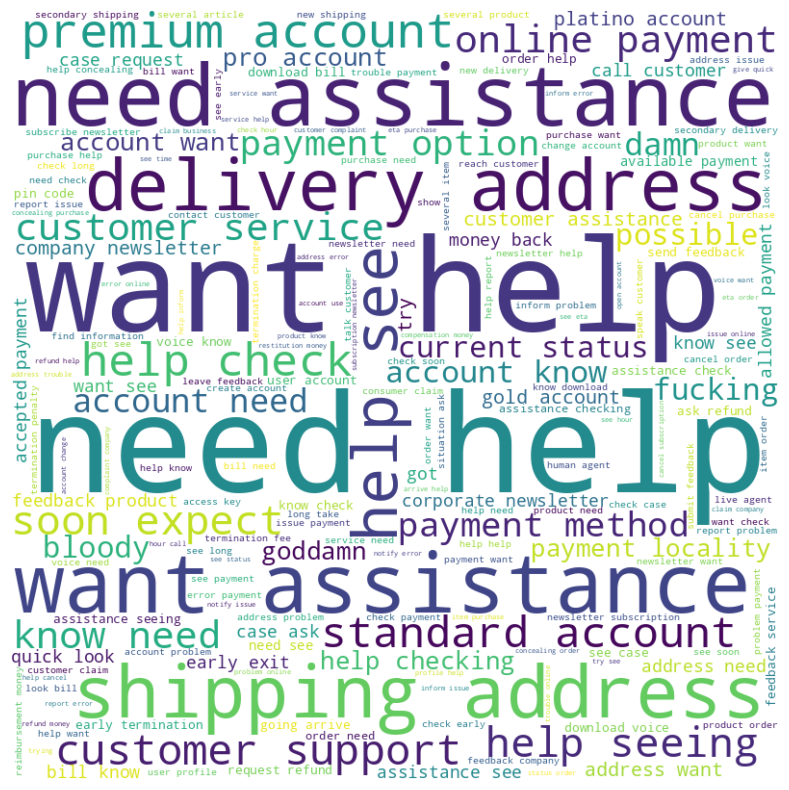

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Assuming 'df' is your DataFrame with the 'nostopword_instruction' column
text = " ".join(word for sublist in df['nostopword_instruction'] for word in sublist)  # Assuming it's a list of lists
print(text)


stopwords = set(STOPWORDS)
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=800).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It provides a general intuition, but it does not allow for comparison or highlight differences in word frequency.

### 2. Bar Chart

In [ ]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
corpus = [word for i in df['nostopword_instruction'] for word in i if word not in stop]

In [ ]:
corpus

['question',
 'concealing',
 'order',
 'question',
 'concealing',
 'order',
 'need',
 'help',
 'concealing',
 'purchase',
 'need',
 'cancel',
 'purchase',
 'afford',
 'order',
 'cancel',
 'purchase',
 'help',
 'cancel',
 'order',
 'longer',
 'afford',
 'order',
 'cancel',
 'trying',
 'cancel',
 'purchase',
 'got',
 'cancel',
 'purchase',
 'need',
 'help',
 'concealing',
 'purchase',
 'know',
 'cancel',
 'order',
 'problem',
 'concealing',
 'purchase',
 'problem',
 'concealing',
 'purchase',
 'help',
 'concealing',
 'order',
 'help',
 'concealing',
 'purchase',
 'help',
 'cancel',
 'purchase',
 'cancel',
 'purchase',
 'bought',
 'item',
 'twice',
 'cancel',
 'order',
 'need',
 'help',
 'concealing',
 'order',
 'want',
 'assistance',
 'concealing',
 'order',
 'trying',
 'cancel',
 'order',
 'problem',
 'concealing',
 'order',
 'assistance',
 'concealing',
 'purchase',
 'need',
 'help',
 'concealing',
 'purchase',
 'help',
 'concealing',
 'order',
 'want',
 'assistance',
 'concealing',
 '

In [ ]:
from nltk.probability import FreqDist
most_common= FreqDist(corpus).most_common(10)
most_common

[('help', 6461),
 ('need', 3973),
 ('want', 3405),
 ('account', 3312),
 ('assistance', 2999),
 ('know', 2643),
 ('see', 2491),
 ('check', 2041),
 ('payment', 2010),
 ('address', 2000)]

In [ ]:
corpus_set=set(corpus)
len(corpus_set)

868

Initially, we can say that our vocabulary consists of **868** unique words.

In [ ]:
len(corpus)

102149

In [ ]:
words , frequency = [] , []
for word, count in most_common:
    words.append(word)
    frequency.append(count)

<Axes: >

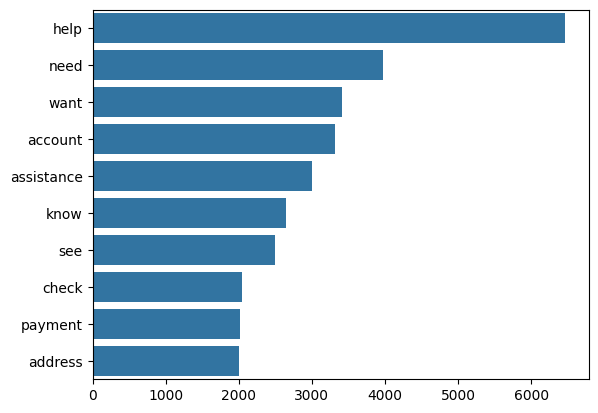

In [ ]:
sns.barplot(x=frequency,y=words)

## Least common words

In [ ]:
# Get the 10 least common words (or change the number as needed)
least_common = FreqDist(corpus).most_common()[:-21:-1]
print(least_common)

[('nay', 1), ('pressed', 1), ('reimbursmeent', 1), ('respect', 1), ('reimbursxement', 1), ('reimburswment', 1), ('reimbjrsement', 1), ('delicate', 1), ('local', 1), ('locke', 1), ('state', 1), ('teeth', 1), ('late', 1), ('star', 1), ('seeingorder', 1), ('recorder', 1), ('petya', 1), ('location', 1), ('stage', 1), ('cancheck', 1)]


In [ ]:
fdist = FreqDist(corpus) # Assuming 'corpus' is your list of words
words_with_count_3 = [word for word in fdist if fdist[word] <= 3]
print(words_with_count_3)
   # or use the 'words_with_count_1' list for further analysis

['include', 'si', 'chosen', 'deliveryaddress', 'headdress', 'thecally', 'youhelp', 'invoicesfrom', 'ball', 'involve', 'year', 'knowwhat', 'nine', 'paymentmethods', 'portion', 'donknow', 'neck', 'situationscan', 'refundable', 'plain', 'customerservice', 'transferring', 'parent', 'directing', 'drive', 'mt', 'needhelp', 'ho', 'reimbursing', 'companynewsletter', 'scant', 'cancer', 'havegot', 'parceling', 'cancelliung', 'mixed', 'debt', 'ii', 'ten', 'moreabout', 'tissue', 'credit', 'wantassistance', 'shining', 'thing', 'wannasee', 'canuhelp', 'checkthe', 'cant', 'ionvoice', 'invoicefrom', 'checkbill', 'invoke', 'three', 'involves', 'five', 'june', 'seen', 'invoicr', 'eight', 'invoicce', 'smith', 'december', 'modaliites', 'helpchecking', 'acceptedpayment', 'showman', 'royalty', 'round', 'refuse', 'motto', 'entitled', 'reinbursements', 'howling', 'somehelp', 'reimbirsements', 'consume', 'dissatisfied', 'extremely', 'terrible', 'wanthelp', 'anybody', 'whathours', 'contactcustomer', 'working', 

In [ ]:
len(set(words_with_count_3))

466

In [ ]:
len((words_with_count_3))

466

### drop words if them frequency <= 3******

In [ ]:
# def remove_low_frequency_words(text_list, low_frequency_words):
#     """Removes words with frequency 3 or less from a list of words.

#     Args:
#         text_list: The list of words (tokens).
#         low_frequency_words: The list of low-frequency words to be removed.

#     Returns:
#         The filtered list of words.
#     """
#     # print(text_list)

#     filtered_text = [word for word in text_list if word not in low_frequency_words]
#     # print(filtered_text)
#     return filtered_text


# df["most_frequent_instruction"] = df["nostopword_instruction"].apply(lambda x: remove_low_frequency_words(x, words_with_count_3))

In [ ]:
# df.drop(columns={"most_frequent_instruction"},inplace=True)

In [ ]:
df.head()

,instruction,category,No_of_Characters,No_of_Words,No_of_sentence,clean_instruction,tokenize_instruction,lemmatized_instruction,nostopword_instruction
0,question about concealing order,ORDER,32,4,1,question about concealing order,"[question, about, concealing, order]","[question, about, concealing, order]","[question, concealing, order]"
1,i have a question about concealing order,ORDER,42,7,1,i have a question about concealing order,"[i, have, a, question, about, concealing, order]","[i, have, a, question, about, concealing, order]","[question, concealing, order]"
2,i need help concealing purchase,ORDER,31,5,1,i need help concealing purchase,"[i, need, help, concealing, purchase]","[i, need, help, concealing, purchase]","[need, help, concealing, purchase]"
3,I need to cancel purchase,ORDER,26,5,1,i need to cancel purchase,"[i, need, to, cancel, purchase]","[i, need, to, cancel, purchase]","[need, cancel, purchase]"
4,"I cannot afford this order, cancel purchase",ORDER,44,9,1,i cannot afford this order cancel purchase,"[i, can, not, afford, this, order, cancel, pur...","[i, can, not, afford, this, order, cancel, pur...","[afford, order, cancel, purchase]"


In [ ]:
df.isnull().mean()*100

,0
instruction,0.0
category,0.0
No_of_Characters,0.0
No_of_Words,0.0
No_of_sentence,0.0
clean_instruction,0.0
tokenize_instruction,0.0
lemmatized_instruction,0.0
nostopword_instruction,0.0


# Text Representation

from here we will work on : most_frequent_instruction as is our curpos

In [ ]:
df.columns


Index(['instruction', 'category', 'No_of_Characters', 'No_of_Words',
       'No_of_sentence', 'clean_instruction', 'tokenize_instruction',
       'lemmatized_instruction', 'nostopword_instruction'],
      dtype='object')

## Vectorization

## Split Data First

In [ ]:
df2 = df[['nostopword_instruction','category']]

In [ ]:
df2['nostopword_instruction'] = df2['nostopword_instruction'].apply(lambda x: ' '.join(x))

In [ ]:
df2.head()

,nostopword_instruction,category
0,question concealing order,ORDER
1,question concealing order,ORDER
2,need help concealing purchase,ORDER
3,need cancel purchase,ORDER
4,afford order cancel purchase,ORDER


In [ ]:
df2.isnull().mean()*100

,0
nostopword_instruction,0.0
category,0.0


In [ ]:
df2.to_csv("befor_vectorization.csv",index=False)

In [ ]:
x = df2['nostopword_instruction']
y = df2['category']

In [ ]:
x.head()

,nostopword_instruction
0,question concealing order
1,question concealing order
2,need help concealing purchase
3,need cancel purchase
4,afford order cancel purchase


In [ ]:
x.info()

<class 'pandas.core.series.Series'>
Index: 24635 entries, 0 to 26871
Series name: nostopword_instruction
Non-Null Count  Dtype 
--------------  ----- 
24635 non-null  object
dtypes: object(1)
memory usage: 384.9+ KB


In [ ]:
x.isnull().mean()*100

np.float64(0.0)

In [ ]:
x[x.isnull()==True]

,nostopword_instruction


In [ ]:
x.dropna(inplace=True)

In [ ]:
x.head()

,nostopword_instruction
0,question concealing order
1,question concealing order
2,need help concealing purchase
3,need cancel purchase
4,afford order cancel purchase


In [ ]:
x.info()

<class 'pandas.core.series.Series'>
Index: 24635 entries, 0 to 26871
Series name: nostopword_instruction
Non-Null Count  Dtype 
--------------  ----- 
24635 non-null  object
dtypes: object(1)
memory usage: 384.9+ KB


In [ ]:
y.head()

,category
0,ORDER
1,ORDER
2,ORDER
3,ORDER
4,ORDER


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Frequency-based Embedding (applied on df2)

#### Bag of words (Count vectorizer)

#### N-Gram

In [ ]:
x_train

,nostopword_instruction
20197,recover pin user
11180,want assistance meeting standard account
14614,know edit damn account
10845,know create standard account
24879,need help check eta purchase
...,...
23195,trouble setting secondary shipping address
6101,trying see case request refund
1392,correcting order
17415,try receive newsletter


In [ ]:
x_train.isnull().mean()*100

np.float64(0.0)

In [ ]:
x_train[x_train.isnull()]

,nostopword_instruction


In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,2))
x_train_bow = vectorizer.fit_transform(x_train)
x_test_bow = vectorizer.transform(x_test)

x_train_bow_dense = x_train_bow.toarray()
feature_names = vectorizer.get_feature_names_out()
bow_df = pd.DataFrame(x_train_bow_dense, columns=feature_names)

display(bow_df)


,aboutforgotten,aboutforgotten pas,accept,accept card,accept help,accept need,accepted,accepted help,accepted payment,acceptedpayment,...,yet could,yet end,yet got,yet help,yet need,yet open,yet try,yet want,youhave,youhave email
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
bow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19708 entries, 0 to 19707
Columns: 5735 entries, aboutforgotten to youhave email
dtypes: int64(5735)
memory usage: 862.3 MB


In [ ]:
from nltk import ngrams # For generating n-grams
from nltk import word_tokenize

In [ ]:
def generate_ngrams(text, n):
  """Generates n-grams from a string.

  Args:
    text: The input string.
    n: The desired n-gram size.

  Returns:
    A list of n-grams.
  """
  tokens = word_tokenize(text)  # Tokenize the string
  n_grams = ngrams(tokens, n)
  return [' '.join(grams) for grams in n_grams]  # Join tokens to create phrases

In [ ]:
df2['bi_grams'] = df2['nostopword_instruction'].apply(lambda x: generate_ngrams(x, 2))
df2['tri_grams'] = df2['nostopword_instruction'].apply(lambda x: generate_ngrams(x, 3))

In [ ]:
df2.head()

,nostopword_instruction,category,bi_grams,tri_grams
0,question concealing order,ORDER,"[question concealing, concealing order]",[question concealing order]
1,question concealing order,ORDER,"[question concealing, concealing order]",[question concealing order]
2,need help concealing purchase,ORDER,"[need help, help concealing, concealing purchase]","[need help concealing, help concealing purchase]"
3,need cancel purchase,ORDER,"[need cancel, cancel purchase]",[need cancel purchase]
4,afford order cancel purchase,ORDER,"[afford order, order cancel, cancel purchase]","[afford order cancel, order cancel purchase]"


##### plot the most grams appers

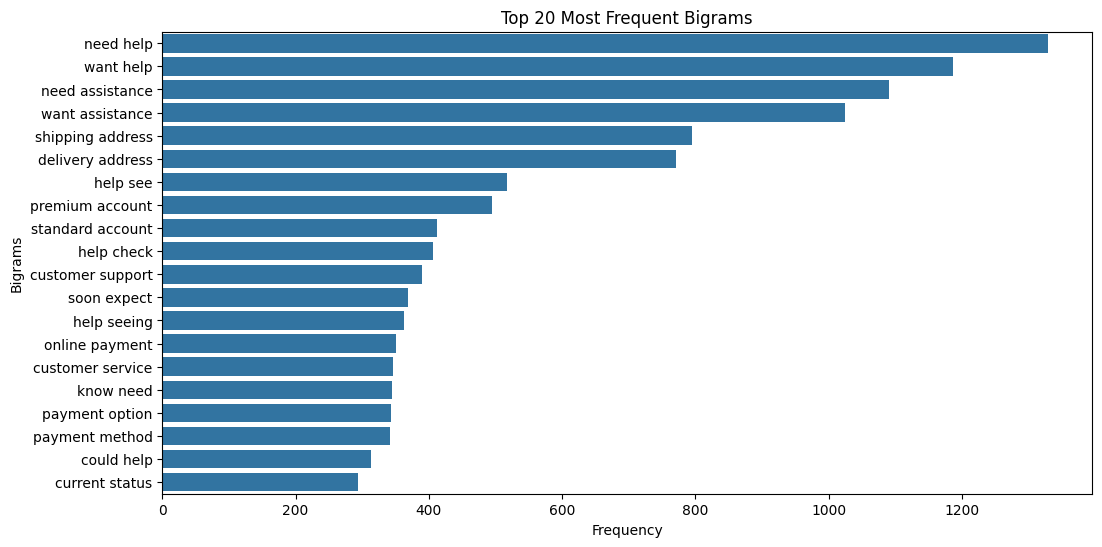

In [ ]:
from collections import Counter

# 1. Combine all bigrams into a single list
all_bigrams = []
for bigram_list in df2['bi_grams']:
    all_bigrams.extend(bigram_list)

# 2. Count the frequency of each bigram
bigram_freq = Counter(all_bigrams)

# 3. Get the most frequent bigrams
# (e.g., top 20, change the number as needed)
top_bigrams = bigram_freq.most_common(20)

# 4. Separate bigrams and their frequencies for plotting
bigrams, frequencies = zip(*top_bigrams)

# 5. Create the bar chart using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust figure size
sns.barplot(x=frequencies, y=bigrams)
plt.title('Top 20 Most Frequent Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()

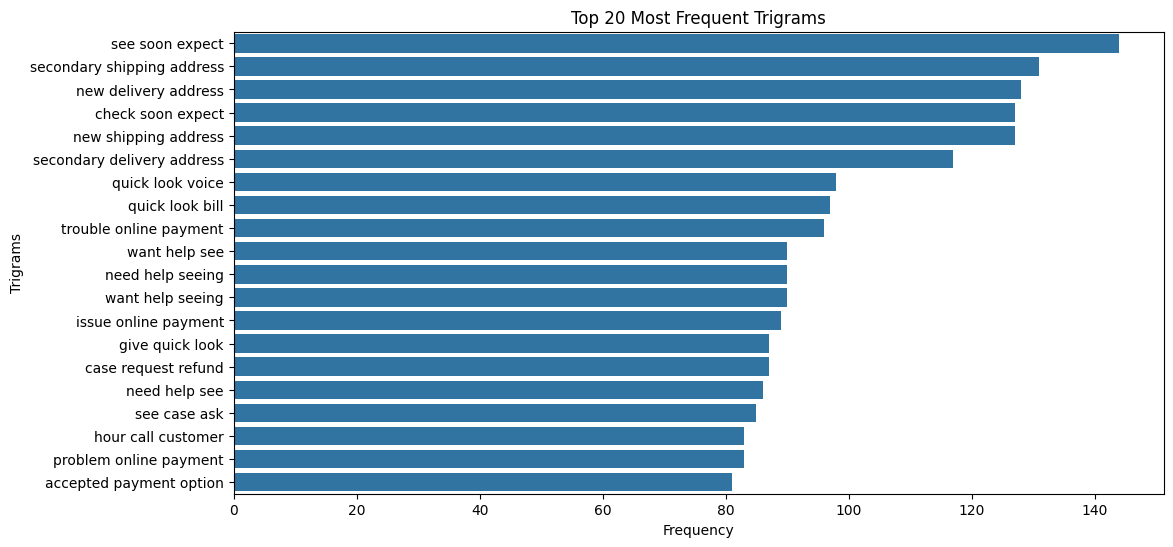

In [ ]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Combine all trigrams into a single list
all_trigrams = []
for trigram_list in df2['tri_grams']:
    all_trigrams.extend(trigram_list)

# 2. Count the frequency of each trigram
trigram_freq = Counter(all_trigrams)

# 3. Get the most frequent trigrams
top_trigrams = trigram_freq.most_common(20)

# 4. Separate trigrams and their frequencies for plotting
trigrams, frequencies = zip(*top_trigrams)

# 5. Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=frequencies, y=trigrams)
plt.title('Top 20 Most Frequent Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.show()

#### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(min_df=2, max_df=0.95)
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

x_train_tfidf_dense =x_train_tfidf.toarray()

feature_names = vectorizer.get_feature_names_out()
train_tfidf_df = pd.DataFrame(x_train_tfidf_dense,columns = feature_names)

In [ ]:
train_tfidf_df.head()

,accept,accepted,acceptedpayment,access,account,accountfor,acquire,acquiring,add,adding,...,wit,withdrawal,word,work,would,write,writing,wrong,year,yet
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.295506,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.347657,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.350959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_tfidf_df['accept'].unique()

array([0.        , 0.77439915, 0.63367202, 0.71002153, 0.69393587,
       0.64989701, 0.70534033, 0.649324  , 0.66869839, 0.66822942,
       0.733125  , 0.72469443, 0.72797516, 0.69400228, 0.66642106,
       0.6011341 , 0.58971848, 0.56122201, 0.56001429, 0.72977447,
       0.70116607, 0.67171026, 0.65944742, 0.56313867, 0.65770983,
       0.64951285, 0.54939921, 0.64847281, 0.68102073, 0.69681472,
       0.68359194, 0.67079887, 0.55398869, 0.70836408])

##### Visualize the data distribution across different classes 📊

In [ ]:
train_tfidf_df['category'] = y_train

In [ ]:
# Top TF-IDF Words Per Class
grouped = train_tfidf_df.groupby('category').mean()
top_n = 10
top_words_per_class = {}
for category in grouped.index:
    sorted_words = grouped.loc[category].sort_values(ascending=False)
    top_words_per_class[category] = sorted_words.head(top_n)

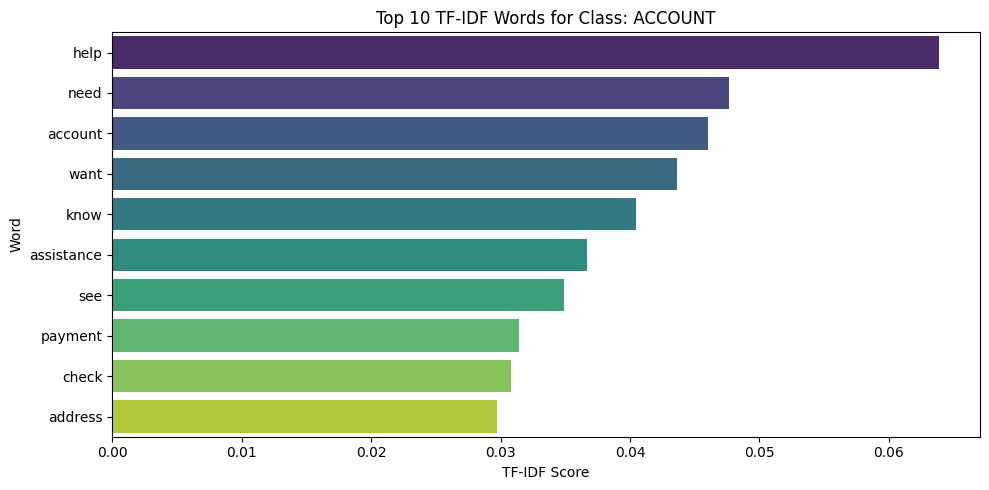

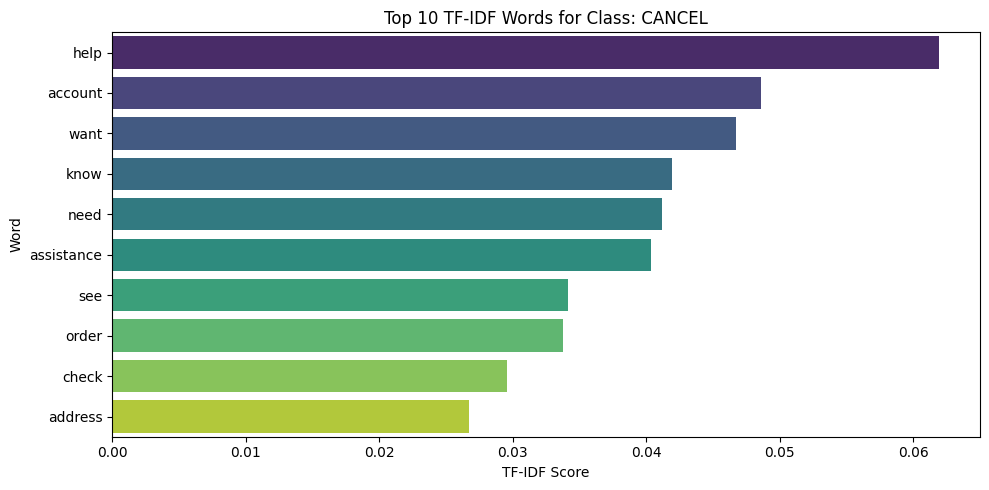

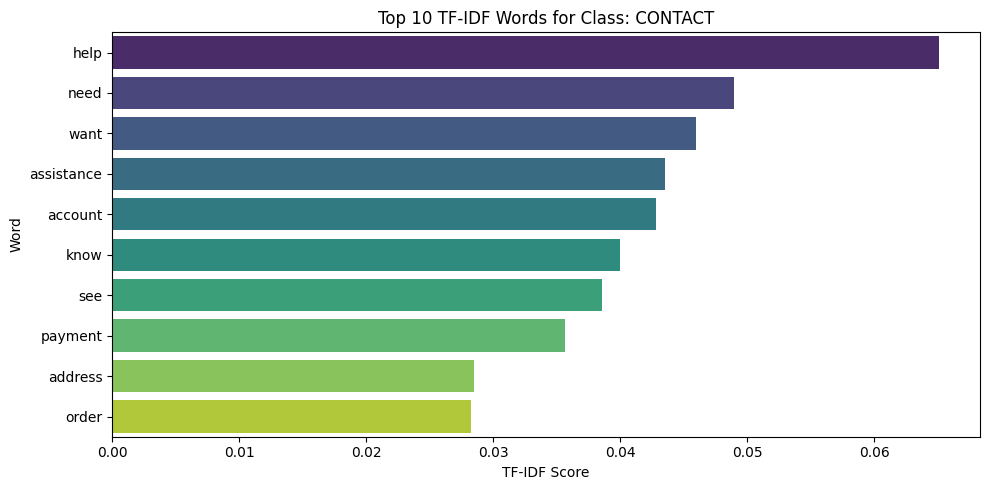

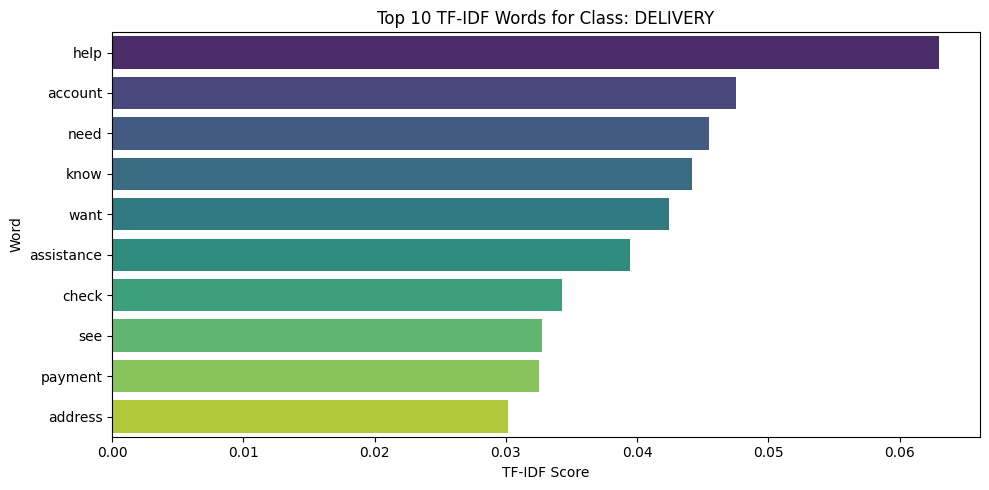

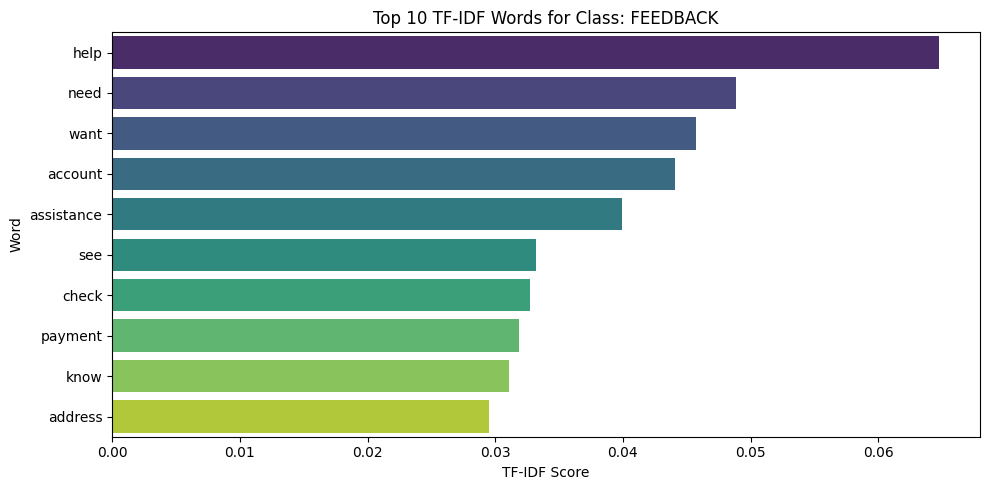

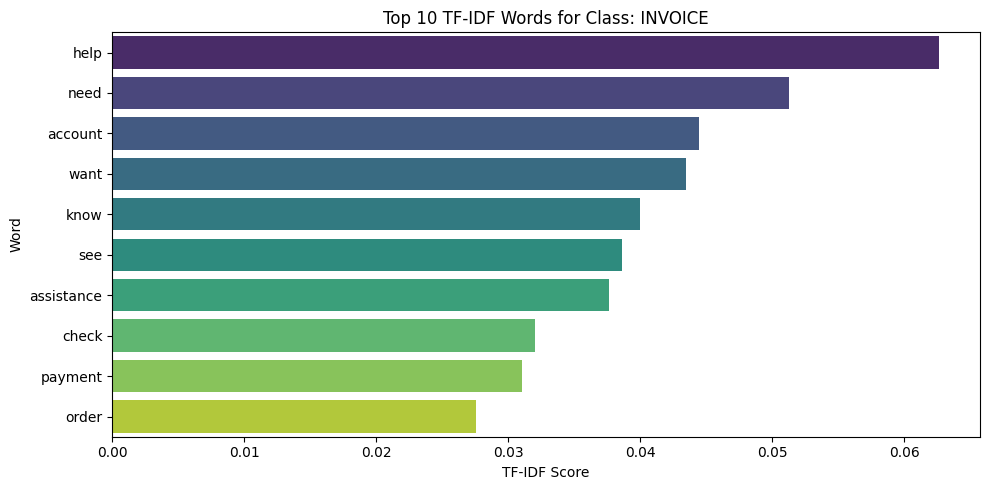

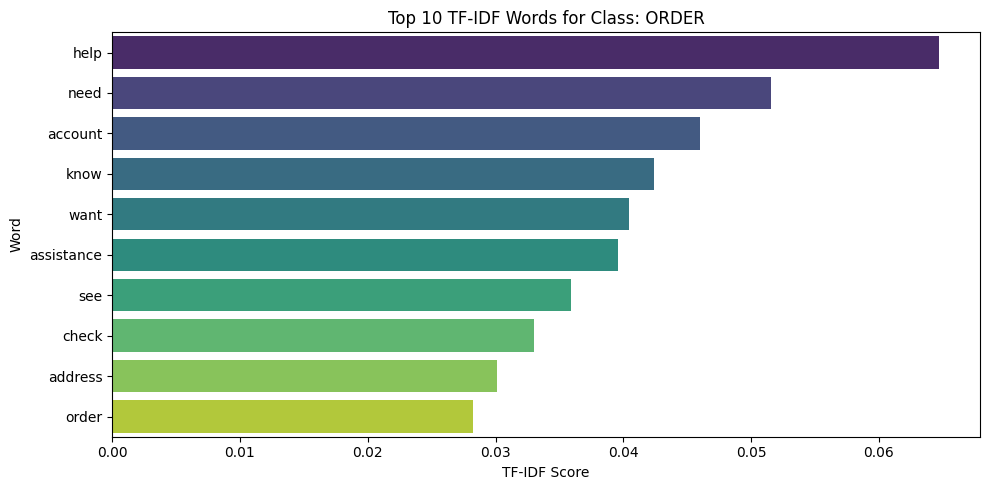

In [ ]:
# Visualize Bar Plots
for category, top_words in top_words_per_class.items():
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')
    plt.title(f'Top {top_n} TF-IDF Words for Class: {category}')
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Word')
    plt.tight_layout()
    plt.show()

# Build Preprocessing Pipeline

## Read Data

In [ ]:
df = pd.read_csv("/content/Bitext_Sample_Customer_Support_Training_Dataset_27K_responses-v11 (1).csv")

In [ ]:
df.head()

,flags,instruction,category,intent,response
0,B,question about cancelling order {{Order Number}},ORDER,cancel_order,I've understood you have a question regarding ...
1,BQZ,i have a question about cancelling oorder {{Or...,ORDER,cancel_order,I've been informed that you have a question ab...
2,BLQZ,i need help cancelling puchase {{Order Number}},ORDER,cancel_order,I can sense that you're seeking assistance wit...
3,BL,I need to cancel purchase {{Order Number}},ORDER,cancel_order,I understood that you need assistance with can...
4,BCELN,"I cannot afford this order, cancel purchase {{...",ORDER,cancel_order,I'm sensitive to the fact that you're facing f...


## Specify specific columns for the same problem

In [ ]:
df  = df[["category",'instruction']]

In [ ]:
df.head()

,category,instruction
0,ORDER,question about cancelling order {{Order Number}}
1,ORDER,i have a question about cancelling oorder {{Or...
2,ORDER,i need help cancelling puchase {{Order Number}}
3,ORDER,I need to cancel purchase {{Order Number}}
4,ORDER,"I cannot afford this order, cancel purchase {{..."


In [ ]:
df.shape

(26872, 2)

In [ ]:
# Drop nulls and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(24635, 2)

## Start the pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


###  Advanced Text Preprocessing :

In [ ]:
# 🔹 1. Advanced Text Preprocessing Function
def clean_text_advanced(text):
    # Expand contractions
    text = contractions.fix(text)

    # Lowercase
    text = text.lower()

    # Remove digits and punctuation
    text = re.sub(r'\{\{.*?\}\}', '', text)

    text = text.split()
    text = ' '.join(text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

     # Tokenize text
    tokens = word_tokenize(text)

    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token,pos='v') for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos ='v') for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos ='a') for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos ='r') for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos ='s') for token in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos ='n') for token in tokens]

    # Join tokens back into a string
    cleaned_text = ' '.join(lemmatized_tokens)

    # Optional: Spell correction (can slow down processing)
    cleaned_text = str(TextBlob(cleaned_text).correct())

    # # Spell correction (optional - slow on large datasets)
    # text = str(TextBlob(text).correct())

    return cleaned_text


### Splitting Data (Features and target)

In [ ]:
# Features and target (keep as text for now)
x = df[['instruction']]
y = df['category']

In [ ]:
x.head()

,instruction
0,question about cancelling order {{Order Number}}
1,i have a question about cancelling oorder {{Or...
2,i need help cancelling puchase {{Order Number}}
3,I need to cancel purchase {{Order Number}}
4,"I cannot afford this order, cancel purchase {{..."


In [ ]:
y.head()

,category
0,ORDER
1,ORDER
2,ORDER
3,ORDER
4,ORDER


###  Push Our advanced TextPreprocessing

In [ ]:
# Preprocessor for text column using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('text_tfidf', TfidfVectorizer(preprocessor=clean_text_advanced, stop_words='english'), 'instruction')
])

In [ ]:
# Build full pipeline with classifier
preprocessing_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor)
])

### Splitting Data befor encoding our target

In [ ]:
# Split data BEFORE encoding
temp_x_train, temp_x_test, temp_y_train, temp_y_test = train_test_split(x, y, test_size=0.2, random_state=42)


###  Label Encoding (On terget)

In [ ]:
# Encode y AFTER splitting
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(temp_y_train)
y_test = label_encoder.transform(temp_y_test)
x_train = temp_x_train
x_test = temp_x_test

### Fit Our Pipeline

In [ ]:
x_train

,instruction
3566,want help seeing the early termination fee
14625,can ya help me updating the details included o...
6599,want assistance checking your reimbursement plicy
9532,how do I speak to an assistant?
24355,can I use the {{Account Category}} acclunt?
...,...
21575,assistance to notify of a problem with registr...
5390,I am trying to see the accepted payment methods
860,can you help me camceling the purchase I made?
15795,i dont know what ineed to do to download invoi...


In [ ]:
x_test

,instruction
9329,I can't talk with a human agent
4160,I have got to locate hte bills from {{Person N...
18500,"I cannot pay, help me to inform of a problem w..."
8840,I want help speaking to customer service
5098,I try to see th accepted payment options
...,...
4834,I need assistance to give a quick look at the ...
3612,can i check theearly exit penalty
23653,"I have got to submit a shipping address, help me"
836,i do not know how i can canmcel order {{Order ...


In [ ]:
# Fit and transform data
X_train_preprocessed = preprocessing_pipeline.fit_transform(x_train)

In [ ]:
X_test_preprocessed = preprocessing_pipeline.fit_transform(x_test)

### Save the Preprocessing and Label Encoding :

In [ ]:
import joblib

In [ ]:
# Save Model + Label Encoder
joblib.dump(preprocessing_pipeline, 'text_preprocessing_pipeline.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')
print("\nText Preprocessor and Label Encoder saved!")


Text Preprocessor and Label Encoder saved!
